# Predicting Housing Prices
**Authors:** Scott Breitbach, Pushkar Chougule, & Rachel Nelson 

### Load and Review Raw Data

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data sets
dfTrain = pd.read_csv("data/train.csv")
dfTest = pd.read_csv("data/test.csv")

# Get # of rows and columns of data set
print("Shape of training data set:", dfTrain.shape)
print("Shape of testing data set: ", dfTest.shape)

Shape of training data set: (1460, 81)
Shape of testing data set:  (1459, 80)


In [3]:
# Combine data sets for Data Analysis
dfBoth = pd.concat([dfTrain, dfTest], keys=['train', 'test'], names=['dataSet', 'index'])
print("Shape of combined data set:", dfBoth.shape)

Shape of combined data set: (2919, 81)


In [4]:
## Display the list of column names in the combined dataset
list(dfBoth.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [5]:
# Looking at data
dfBoth.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
dataSet index                                                               
train   0       1          60       RL         65.0     8450   Pave   NaN   
        1       2          20       RL         80.0     9600   Pave   NaN   
        2       3          60       RL         68.0    11250   Pave   NaN   
        3       4          70       RL         60.0     9550   Pave   NaN   
        4       5          60       RL         84.0    14260   Pave   NaN   

              LotShape LandContour Utilities  ... PoolArea PoolQC Fence  \
dataSet index                                 ...                         
train   0          Reg         Lvl    AllPub  ...        0    NaN   NaN   
        1          Reg         Lvl    AllPub  ...        0    NaN   NaN   
        2          IR1         Lvl    AllPub  ...        0    NaN   NaN   
        3          IR1         Lvl    AllPub  ...        0    NaN   NaN   
        4          IR1         Lvl    AllPub  ...        0    NaN   NaN   

              MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  \
dataSet index                                                              
train   0             NaN       0      2   2008        WD         Normal   
        1             NaN       0      5   2007        WD         Normal   
        2             NaN       0      9   2008        WD         Normal   
        3             NaN       0      2   2006        WD        Abnorml   
        4             NaN       0     12   2008        WD         Normal   

               SalePrice  
dataSet index             
train   0       208500.0  
        1       181500.0  
        2       223500.0  
        3       140000.0  
        4       250000.0  

[5 rows x 81 columns]

In [6]:
# Get summary statistics
dfBoth.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


### Data Cleansing and Prep
Reviewing Null Values

In [7]:
# Get a sorted list of the numbers of Null values
missingVals = dfBoth.isnull().sum()
missingVals = missingVals[missingVals > 0]
missingVals.sort_values()

Electrical         1
GarageArea         1
GarageCars         1
Exterior1st        1
Exterior2nd        1
KitchenQual        1
SaleType           1
TotalBsmtSF        1
BsmtFinSF1         1
BsmtUnfSF          1
BsmtFinSF2         1
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

<AxesSubplot:title={'center':'Missing Values'}>

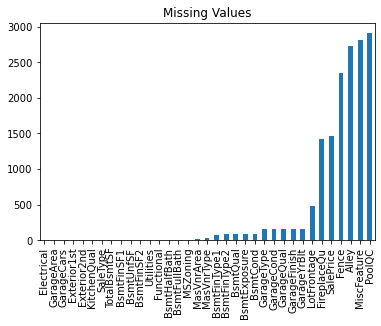

In [8]:
# Create Chart of missing values
missingVals.sort_values(inplace=True)
plt.title('Missing Values')
missingVals.plot.bar()

In [9]:
def fixNullValues(df):
    '''
    Replace NA with 'None' or '0' where applicable based on variable
    '''
    
    nullIsNone = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure",  "PoolQC",
                  "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType",
                  "GarageFinish", "GarageQual", "GarageCond", "Fence", 
                  "MasVnrType", "MiscFeature"]
    for i in nullIsNone:
        df[i].fillna('None', inplace=True)
    
    nullIsZero = ["GarageArea", "GarageCars", "GarageYrBlt", "TotalBsmtSF", 
                  "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "BsmtHalfBath", 
                  "BsmtFullBath", "MasVnrArea", "SalePrice"]
    for i in nullIsZero:
        df[i].fillna(0, inplace=True)
        
    # Impute any remaining numeric Null values with the mean
    df.fillna(df.mean(numeric_only=True), inplace=True)
    
    # Impute any remaining Null values with the mode
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [10]:
# Clean data frame of null values
fixNullValues(dfBoth)

In [11]:
# Get a sorted list of the numbers of Null values
missingVals = dfBoth.isnull().sum()
missingVals = missingVals[missingVals > 0]
missingVals.sort_values()

Series([], dtype: int64)

In [12]:
# Save cleaned data
dfBoth.to_csv('data/dfboth.csv',index=False)

In [13]:
# View new summary stats
dfBoth.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.000000,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.000000,70.0,190.0
LotFrontage,2919.0,69.305795,21.312345,21.0,60.0,69.305795,78.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.000000,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.000000,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.000000,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.000000,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.000000,2004.0,2010.0
MasVnrArea,2919.0,101.396026,178.854579,0.0,0.0,0.000000,163.5,1600.0
BsmtFinSF1,2919.0,441.272011,455.606014,0.0,0.0,368.000000,733.0,5644.0


In [14]:
## removing test set from data since it does not contain the saleprice and we need to look at categorical values
dfTrainC = dfBoth.loc['train']
# dfTrainC.to_csv('data/dfTrainC.csv',index=False)

In [15]:
# Correlation Matrix (Text table)
print("Correlation Matrix")
dfCorr2 = dfTrainC.corr()
#dfCorr2.to_csv('data/dfCorr.csv',index=False)#True)
dfCorr2

Correlation Matrix


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009828,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356828,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009828,-0.356828,1.000000,0.305194,0.234641,-0.053148,0.116955,0.083176,0.178542,0.214800,...,0.076000,0.137147,0.010143,0.062061,0.037665,0.180839,0.000159,0.010366,0.006494,0.334820
LotArea,-0.033226,-0.139781,0.305194,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234641,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053148,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116955,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083176,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178542,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214800,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


### EDA for Numeric Variable Data with Help of Scatter Plots

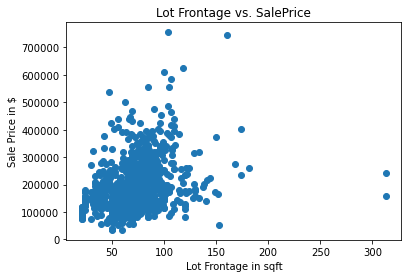

In [16]:
## Lot Frontage relation to Sale Price
plt.scatter(x = "LotFrontage", y = "SalePrice", data = dfTrainC) 
plt.title("Lot Frontage vs. SalePrice")
plt.xlabel("Lot Frontage in sqft")
plt.ylabel("Sale Price in $")
plt.show()

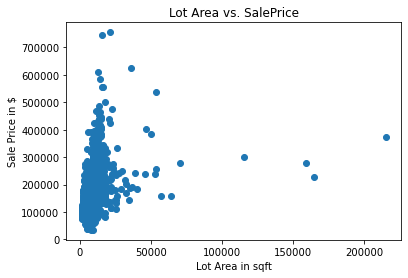

In [17]:
## Lot Area relation to Sale Price
plt.scatter(x = "LotArea", y = "SalePrice", data = dfTrainC) 
plt.title("Lot Area vs. SalePrice")
plt.xlabel("Lot Area in sqft")
plt.ylabel("Sale Price in $")
plt.show()

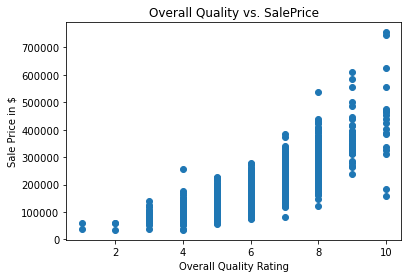

In [18]:
## Overall Quality relation to Sale Price
plt.scatter(x = "OverallQual", y = "SalePrice", data = dfTrainC) 
plt.title("Overall Quality vs. SalePrice")
plt.xlabel("Overall Quality Rating")
plt.ylabel("Sale Price in $")
plt.show()

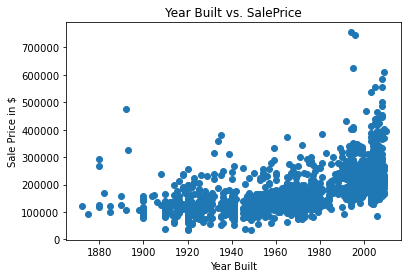

In [19]:
## Year Built relation to Sale Price
plt.scatter(x = "YearBuilt", y = "SalePrice", data = dfTrainC) 
plt.title("Year Built vs. SalePrice")
plt.xlabel("Year Built")
plt.ylabel("Sale Price in $")
plt.show()

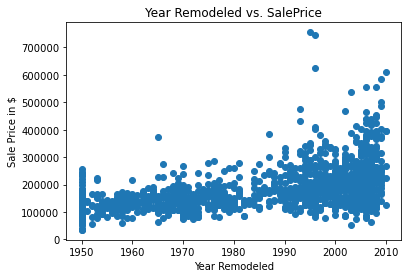

In [20]:
## Year Remodeled relation to Sale Price
plt.scatter(x = "YearRemodAdd", y = "SalePrice", data = dfTrainC) 
plt.title("Year Remodeled vs. SalePrice")
plt.xlabel("Year Remodeled")
plt.ylabel("Sale Price in $")
plt.show()

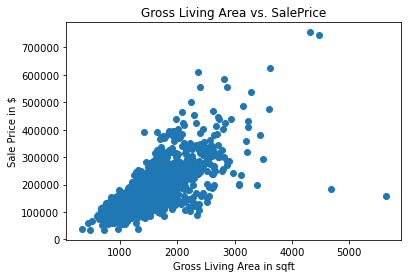

In [21]:
## Living Area relation to Sale Price
plt.scatter(x = "GrLivArea", y = "SalePrice", data = dfTrainC) 
plt.title("Gross Living Area vs. SalePrice")
plt.xlabel("Gross Living Area in sqft")
plt.ylabel("Sale Price in $")
plt.show()

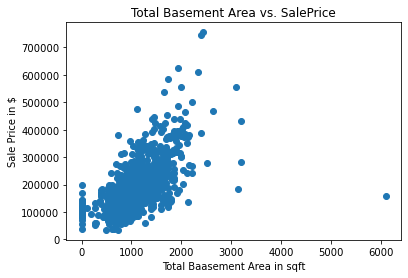

In [22]:
## Basement Area relation to Sale Price
plt.scatter(x = "TotalBsmtSF", y = "SalePrice", data = dfTrainC) 
plt.title("Total Basement Area vs. SalePrice")
plt.xlabel("Total Baasement Area in sqft")
plt.ylabel("Sale Price in $")
plt.show()

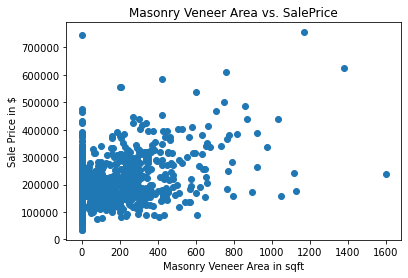

In [23]:
## Masonry Veneer Area relation to Sale Price
plt.scatter(x = "MasVnrArea", y = "SalePrice", data = dfTrainC) 
plt.title("Masonry Veneer Area vs. SalePrice")
plt.xlabel("Masonry Veneer Area in sqft")
plt.ylabel("Sale Price in $")
plt.show()

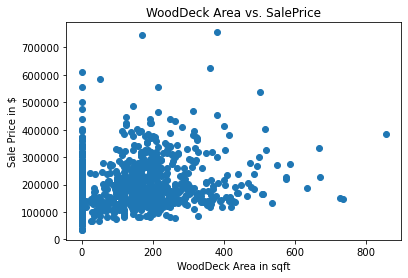

In [24]:
## Wood Deck Area relation to Sale Price
plt.scatter(x = "WoodDeckSF", y = "SalePrice", data = dfTrainC) 
plt.title("WoodDeck Area vs. SalePrice")
plt.xlabel("WoodDeck Area in sqft")
plt.ylabel("Sale Price in $")
plt.show()

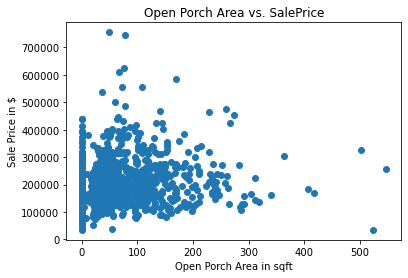

In [25]:
## Open Porch Area relation to Sale Price
plt.scatter(x = "OpenPorchSF", y = "SalePrice", data = dfTrainC) 
plt.title("Open Porch Area vs. SalePrice")
plt.xlabel("Open Porch Area in sqft")
plt.ylabel("Sale Price in $")
plt.show()

Boxplots of categorical data to see which can be removed based on categorical distributions compared to SalePrice

In [26]:
# Create a list of the categorical variables
catColList = dfBoth.select_dtypes(include=['object']).columns.tolist()

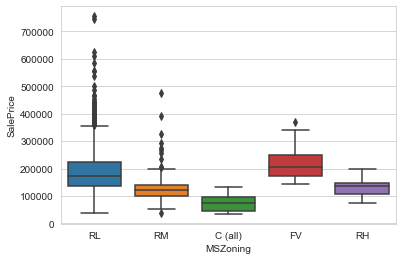

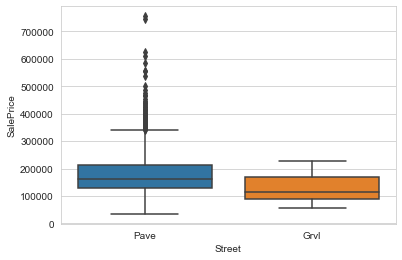

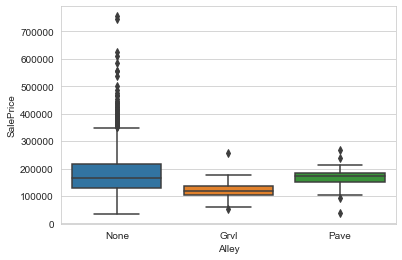

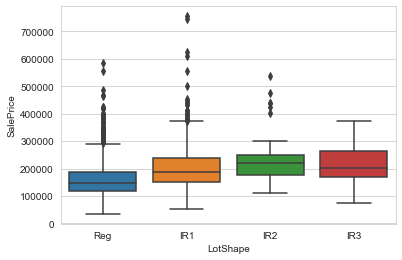

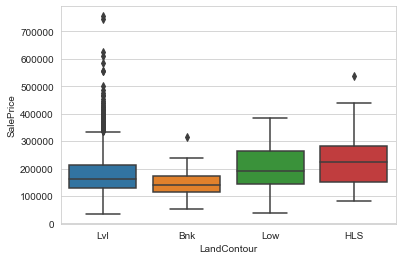

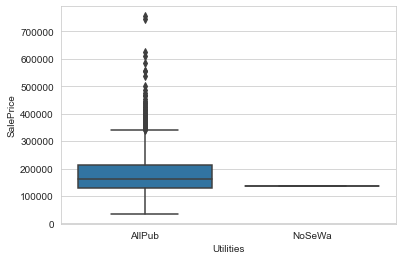

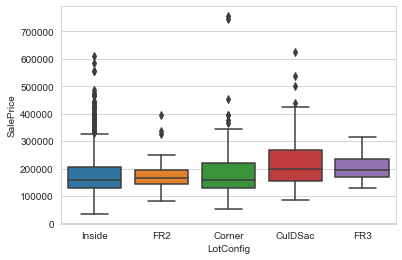

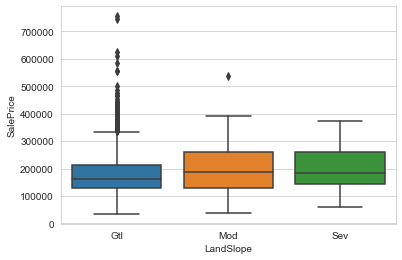

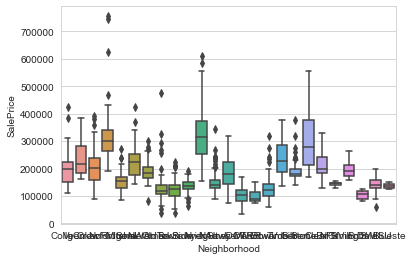

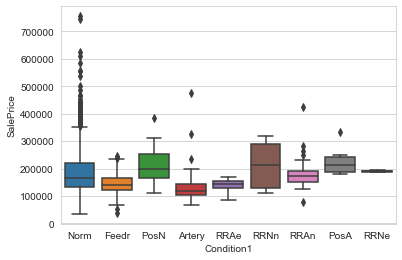

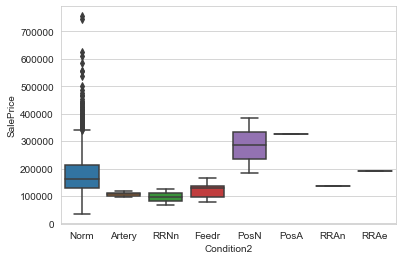

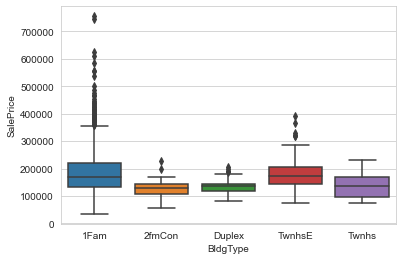

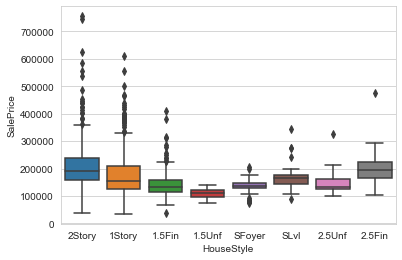

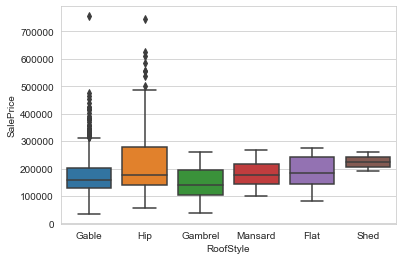

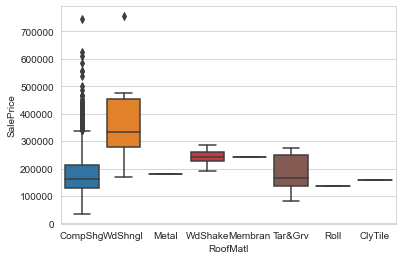

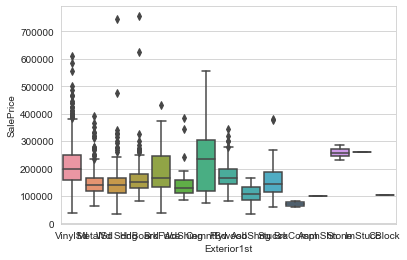

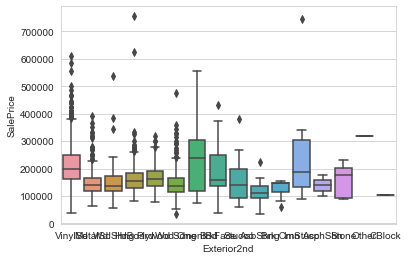

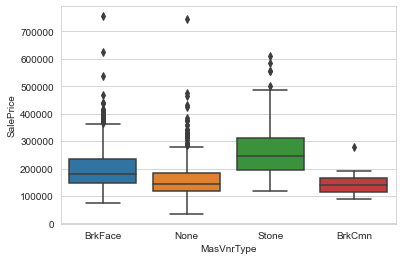

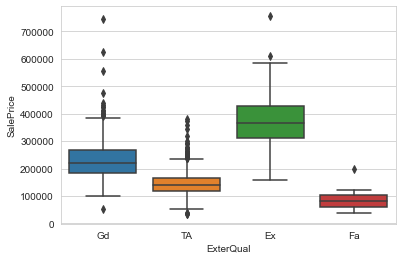

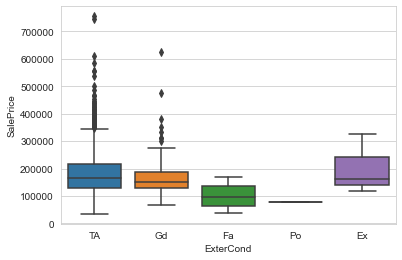

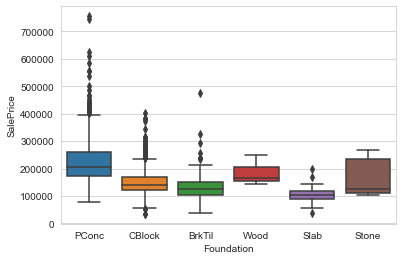

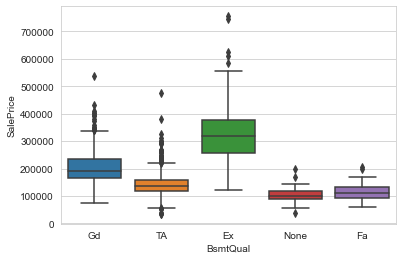

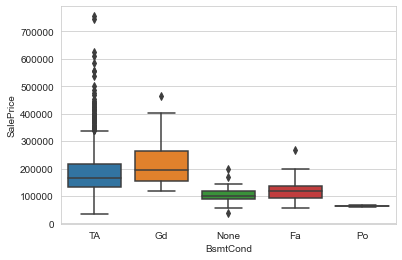

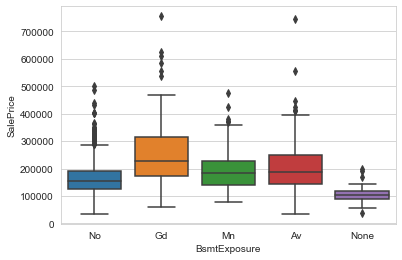

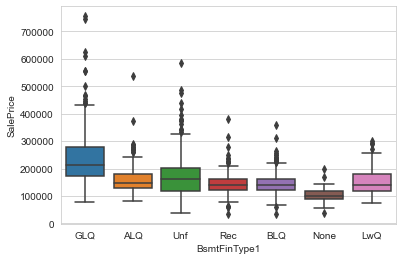

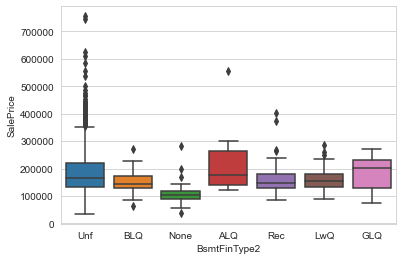

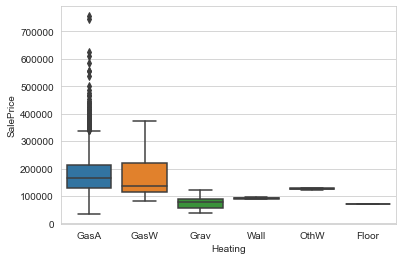

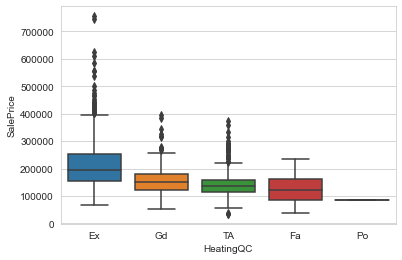

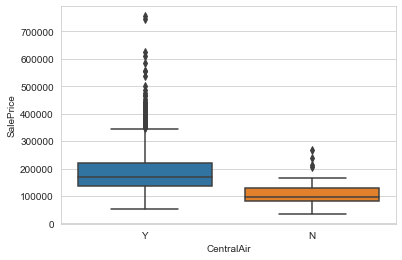

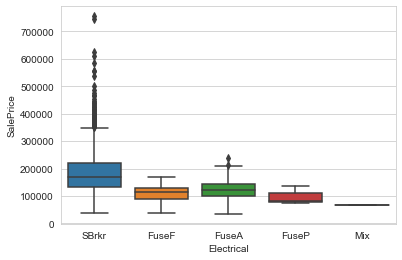

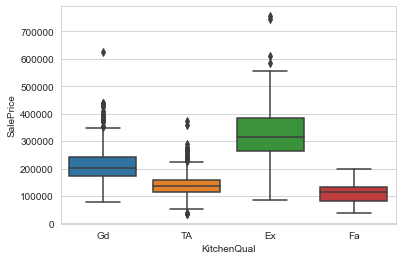

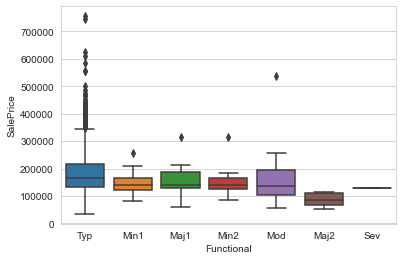

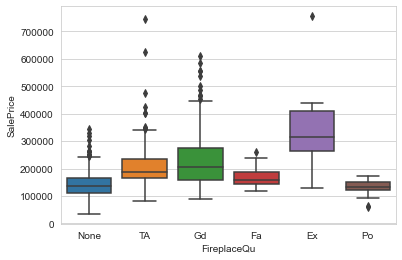

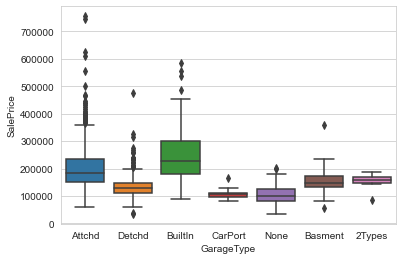

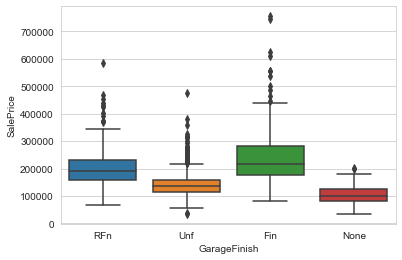

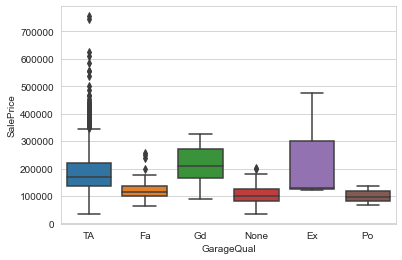

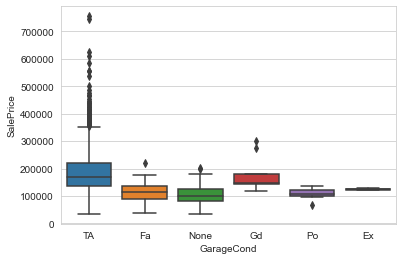

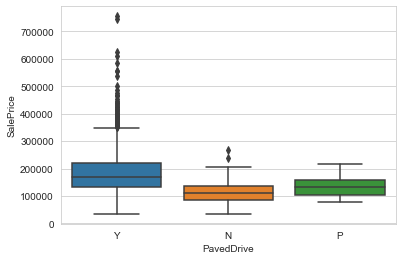

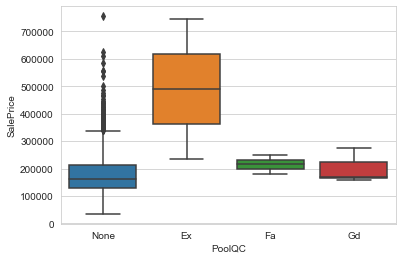

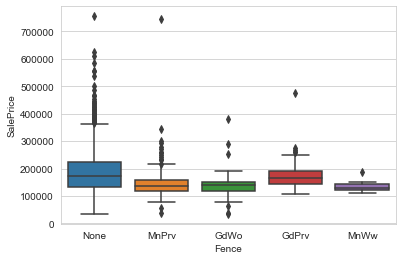

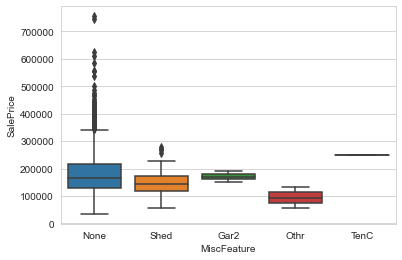

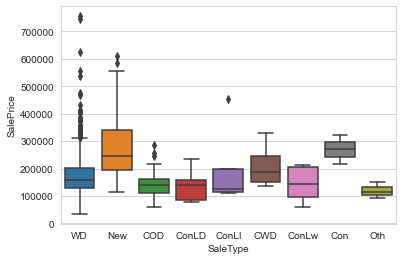

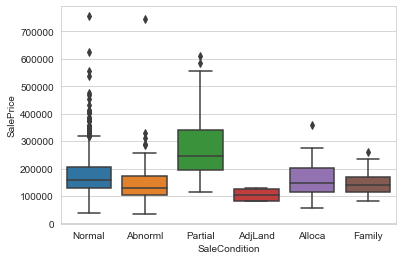

In [27]:
# Set up chart style
sns.set_style("whitegrid")

# Make box plots for each categorical variable
plt.rcParams.update({'figure.max_open_warning': 0}) # eliminate warning
for variable in catColList:
    plt.figure()
    sns.boxplot(x = variable, y = 'SalePrice', data = dfTrainC)

### Encode Ordinal Categorical Variables

In [28]:
# Load libraries
from sklearn.preprocessing import OrdinalEncoder

In [29]:
# Set up lists of variables and order of their categories
lotRegVar = ['LotShape']
lotRegCat = ['None', 'Reg', 'IR1', 'IR2', 'IR3']

slopeVar = ['LandSlope']
slopeCat = ['None', 'Gtl', 'Mod', 'Sev']

qualVar = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
           'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
qualCat = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

bsmExpVar = ['BsmtExposure']
bsmExpCat = ['None', 'No', 'Mn', 'Av', 'Gd']

bsmFinVar = ['BsmtFinType1', 'BsmtFinType2']
bsmFinCat = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']

funcVar = ['Functional']
funcCat = ['None', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']

garFinVar = ['GarageFinish']
garFinCat = ['None', 'Unf', 'RFn', 'Fin']

pavDrvVar = ['PavedDrive']
pavDrvCat = ['None', 'N', 'P', 'Y']

In [30]:
# Encode Lot Irregularity
lotRegEnc = OrdinalEncoder(categories=[lotRegCat])
for i in lotRegVar:
    dfBoth[i] = lotRegEnc.fit_transform(dfBoth[[i]])

# Encode Slope of Lot
slopeEnc = OrdinalEncoder(categories=[slopeCat])
for i in slopeVar:
    dfBoth[i] = slopeEnc.fit_transform(dfBoth[[i]])

# Encode Quality
qualEnc = OrdinalEncoder(categories=[qualCat])
for i in qualVar:
    dfBoth[i] = qualEnc.fit_transform(dfBoth[[i]])

# Encode Basement Exposure
bsmExpEnc = OrdinalEncoder(categories=[bsmExpCat])
for i in bsmExpVar:
    dfBoth[i] = bsmExpEnc.fit_transform(dfBoth[[i]])

# Encode Basement Finish
bsmFinEnc = OrdinalEncoder(categories=[bsmFinCat])
for i in bsmFinVar:
    dfBoth[i] = bsmFinEnc.fit_transform(dfBoth[[i]])

# Encode Home Functionality
funcEnc = OrdinalEncoder(categories=[funcCat])
for i in funcVar:
    dfBoth[i] = funcEnc.fit_transform(dfBoth[[i]])

# Encode Garage Finish
garFinEnc = OrdinalEncoder(categories=[garFinCat])
for i in garFinVar:
    dfBoth[i] = garFinEnc.fit_transform(dfBoth[[i]])

# Encode Driveway Surface
pavDrvEnc = OrdinalEncoder(categories=[pavDrvCat])
for i in pavDrvVar:
    dfBoth[i] = pavDrvEnc.fit_transform(dfBoth[[i]])

In [31]:
## removing test set from data since it does not contain the saleprice and we need to look at categorical values
dfTrainC = dfBoth.loc['train']
dfTrainC.to_csv('data/dfTrainC.csv',index=False)

### Create DF with Dummy Variables

In [32]:
def getDummies(df):
    '''
    Creates dummy variables from categorical variables, adds them
    to the dataframe and returns the new dataframe with dummy vars
    '''
    dummyDF = df.copy()
    catList = dummyDF.select_dtypes(include=['object']).columns.tolist()
    for i in catList:
        dummies = pd.get_dummies(dummyDF[i], prefix=i)
        dummyDF = pd.concat([dummyDF, dummies], axis=1)
    return dummyDF

In [33]:
# Add dummy variable columns to dataframes
dfBoth_dummies = getDummies(dfBoth)
dfTrainC_dummies = getDummies(dfTrainC)

In [34]:
# Confirm dummies
dfBoth_dummies.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
dataSet index                                                               
train   0       1          60       RL         65.0     8450   Pave  None   
        1       2          20       RL         80.0     9600   Pave  None   
        2       3          60       RL         68.0    11250   Pave  None   
        3       4          70       RL         60.0     9550   Pave  None   
        4       5          60       RL         84.0    14260   Pave  None   

               LotShape LandContour Utilities  ... SaleType_ConLw  \
dataSet index                                  ...                  
train   0           1.0         Lvl    AllPub  ...              0   
        1           1.0         Lvl    AllPub  ...              0   
        2           2.0         Lvl    AllPub  ...              0   
        3           2.0         Lvl    AllPub  ...              0   
        4           2.0         Lvl    AllPub  ...              0   

               SaleType_New SaleType_Oth SaleType_WD SaleCondition_Abnorml  \
dataSet index                                                                
train   0                 0            0           1                     0   
        1                 0            0           1                     0   
        2                 0            0           1                     0   
        3                 0            0           1                     1   
        4                 0            0           1                     0   

              SaleCondition_AdjLand SaleCondition_Alloca  \
dataSet index                                              
train   0                         0                    0   
        1                         0                    0   
        2                         0                    0   
        3                         0                    0   
        4                         0                    0   

               SaleCondition_Family  SaleCondition_Normal  \
dataSet index                                               
train   0                         0                     1   
        1                         0                     1   
        2                         0                     1   
        3                         0                     0   
        4                         0                     1   

               SaleCondition_Partial  
dataSet index                         
train   0                          0  
        1                          0  
        2                          0  
        3                          0  
        4                          0  

[5 rows x 257 columns]

In [35]:
# dfTrainC_dummies.head()

### Data Analysis

In [36]:
# Separate data so as to only analyze training data, which contains SalePrice
dfAnalysis = dfBoth_dummies.loc['train'].copy()
dfAnalysis['SalePrice'] = pd.to_numeric(dfAnalysis['SalePrice'])
# Save file
dfAnalysis.to_csv('data/dfAnalysis.csv',index=False)

In [37]:
# Correlation Matrix (Text table)
print("Correlation Matrix")
dfCorr = dfAnalysis.corr()
dfCorr.to_csv('data/dfCorr.csv',index=False)#True)
dfCorr

Correlation Matrix


,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009828,-0.033226,-0.024071,0.005847,-0.028365,0.012609,-0.012713,-0.021998,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.356828,-0.139781,-0.115361,-0.025672,0.032628,-0.059316,0.027850,0.040581,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009828,-0.356828,1.000000,0.305194,0.193074,0.066189,0.234641,-0.053148,0.116955,0.083176,...,-0.051432,0.128296,-0.023187,-0.091303,-0.021761,-0.036702,-0.018055,0.016125,-0.073545,0.126584
LotArea,-0.033226,-0.139781,0.305194,1.000000,0.315484,0.436868,0.105806,-0.005636,0.014228,0.013788,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
LotShape,-0.024071,-0.115361,0.193074,0.315484,1.000000,0.144248,0.198994,-0.033747,0.229365,0.175488,...,0.019314,0.047611,-0.005838,-0.021587,-0.028889,-0.014247,-0.037777,-0.011787,-0.000143,0.046144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.036702,-0.013208,-0.014247,-0.011831,-0.041677,-0.038888,-0.045601,-0.040294,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018055,0.008966,-0.037777,0.034397,-0.044950,-0.033444,-0.010104,-0.020727,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.016125,-0.010781,-0.011787,0.037417,-0.025515,-0.023873,-0.035785,-0.048056,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.073545,0.005711,-0.000143,-0.004330,-0.143282,0.161642,-0.158427,-0.120577,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [38]:
# View 'SalePrice' correlations greater than 0.5
hiCorr = dfCorr['SalePrice'][abs(dfCorr['SalePrice']) > 0.5]
hiCorr

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
ExterQual       0.682639
BsmtQual        0.585207
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual     0.659600
TotRmsAbvGrd    0.533723
FireplaceQu     0.520438
GarageFinish    0.549247
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [39]:
# Get a list of variables which correlate with SalePrice
hiCorrList = hiCorr.index.to_list()
hiCorrList

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [40]:
# Filter the data to only contain high correlation variables
dfBoth_hiCorr = dfBoth_dummies[hiCorrList]
dfBoth_hiCorr.head(5)

OverallQual  YearBuilt  YearRemodAdd  ExterQual  BsmtQual  \
dataSet index                                                              
train   0                7       2003          2003        4.0       4.0   
        1                6       1976          1976        3.0       4.0   
        2                7       2001          2002        4.0       4.0   
        3                7       1915          1970        3.0       3.0   
        4                8       2000          2000        4.0       4.0   

               TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  KitchenQual  \
dataSet index                                                            
train   0            856.0       856       1710         2          4.0   
        1           1262.0      1262       1262         2          3.0   
        2            920.0       920       1786         2          4.0   
        3            756.0       961       1717         1          4.0   
        4           1145.0      1145       2198         2          4.0   

               TotRmsAbvGrd  FireplaceQu  GarageFinish  GarageCars  \
dataSet index                                                        
train   0                 8          0.0           2.0         2.0   
        1                 6          3.0           2.0         2.0   
        2                 6          3.0           2.0         2.0   
        3                 7          4.0           1.0         3.0   
        4                 9          3.0           2.0         3.0   

               GarageArea  SalePrice  
dataSet index                         
train   0           548.0   208500.0  
        1           460.0   181500.0  
        2           608.0   223500.0  
        3           642.0   140000.0  
        4           836.0   250000.0

In [41]:
# Separate data so as to only analyze training data which contains SalePrice
dfAnalysis = dfBoth_hiCorr.loc['train'].copy()
dfAnalysis['SalePrice'] = pd.to_numeric(dfAnalysis['SalePrice'])
# Save file
dfAnalysis.to_csv('data/dfTrain1.csv',index=False)#True)

In [42]:
# Save test file
dftst = dfBoth_hiCorr.loc['test'].copy()
dftst.to_csv('data/dfTest1.csv',index=False)#True)

Histograms: All variables


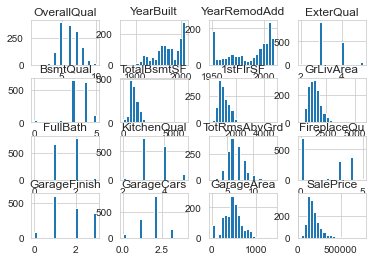

In [43]:
# Show histograms of variables correlating with SalePrice
print("Histograms: All variables")
hist = dfAnalysis.hist(bins=20)